#**0. Introduction**

<center><img src='https://www.heart.org/-/media/Images/News/2019/July-2019/0725LifeExpectancy_SC.jpg' ></center>

Penyakit jantung saat ini merupakan salah satu penyakit yang diderita oleh banyak orang. Penyakit jantung sendiri umumnya mengacu pada pada kondisi yang melibatkan penyempitan ataupun pemblokiran pembuluh darah yang dapat menyebabkan serangan jantung, nyeri dada atau stroke. Penyakit jantung juga memiliki banyak faktor pemicu yang dapat menyebabkan terjadinya serangan jantung.

Kami pun sepakat untuk mengambil studi kasus ini. Sebagai seorang calon Data Scientist yang hebat, disitulah kami tertantang untuk membuat analisis tentang kondisi kesehatan apa saja yang dapat beresiko terkena penyakit jantung.

#**I. Business Understanding**
Pada notebook ini kami akan mencoba melakukan analisis bisnis terhadap salah satu studi kasus di penugasan kedua. Hal-hal yang terkait dengan bisnis akan dijelaskan seperti berikut:

##**Permasalahan Bisnis**

Setiap manusia pasti memiliki kondisi kesehatan yang berbeda-beda, baik mereka yang rentan terkena penyakit atau tidak sama sekali. Ada berbagai macam faktor yang dapat memengaruhi kondisi kesehatan seseorang, mulai dari pola hidup, pola makan dan lain sebagainya. Dalam memperhatikan kondisi kesehatan kita, tidak sedikit dari kita yang cenderung mengabaikannya, contohnya `penyakit jantung`.

Banyak dari kita yang belum sadar bahwa kondisi kesehatan kita yang kita kira baik-baik saja ternyata malah `beresiko terkena penyakit jantung`. Selain itu, banyak dari kita juga `belum paham betul` mengenai tindakan yang tepat `untuk mengatasi penyakit ini`. Dari permasalahan bisnis tersebut, di sini kami akan mencoba melakukan analisis terhadap dataset yang berisi kondisi kesehatan seseorang.



##**Metric Bisnis**

Melakukan analisis data dengan metode Machine Learning sehingga nantinya kita sebagai `1. Penjual alat/jasa/algoritma pendeteksi penyakit jantung` atau `2. Dokter atau penyedia jasa yang bergerak di bidang kesehatan jantung` mempunyai “advantage” daripada kompetitor yang lain, yaitu bisa memprediksi apakah seseorang  terkena penyakit jantung dengan menggunakan data-data yang kita olah dan pada akhirnya kita bisa mengambil keputusan apakah pasien ini terkena penyakit jantung atau tidak.

Sasaran produk ini adalah rumah sakit/klinik pengobatan yang memiliki pengobatan jantung

##**Tujuan Bisnis**

Tujuan dari analisis dataset *heart disease* adalah `untuk mengetahui faktor risiko yang dapat mempengaruhi penyakit jantung` berdasarkan data. 
Selain itu, Dapat mengetahui `faktor risiko mana yang paling berpengaruh` melalui analisis korelasi. Hal inilah yang nantinya akan membuat kita menjadi lebih menyadari akan faktor yang berpengaruh.  Setelah faktor-faktor tersebut diperoleh, diharapkan dapat mencegah atau menghindari datangnya penyakit jantung. 

#**II. Data Understanding**

Setelah pemahaman bisnis kita sudah mendalam, langkah selanjutnya adalah memahami data yang tersedia. Dengan data ini kita tentu akan dapat melakukan solusi untuk menyelesaikan permasalahan bisnis di atas.

##**Impor Paket-paket**

Sebelum kita melakukan analisis, tentu kita harus mempersiapkan paket-paket library yang mungkin akan kita gunakan. Seperti biasa, terdapat library utama kita yakni **Numpy** dan **Pandas**. Kemudian didukung pula oleh paket-paket library lain seperti **Matplotlib**, **Seaborn**, hingga **Dataprep**.

In [ ]:
# paket-paket untuk melakukan pengolahan terhadap datasets
import numpy as np
import pandas as pd
from google.colab import files
import io

# paket-paket untuk memvisualisasi datasets
import matplotlib.pyplot as plt
import seaborn as sns

# paket untuk melakukan automated EDA
!pip install dataprep
from dataprep.eda import plot, plot_correlation, plot_missing, create_report

##**Membaca Datasets**

Langkah selanjutnya adalah membaca datasets, hal ini tentu saja adalah langkah yang wajib. Karena tanpanya, apa mungkin kita dapat melakukan analisis tanpa datasets? Tentu saja tidak! Untuk datasets penyakit jantung dapat diakses melalui [tautan berikut](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) [1].

In [ ]:
# upload datasets penyakit jantung [2]
uploaded = files.upload()

Saving heart-disease.csv to heart-disease.csv


In [ ]:
# baca datasets dan simpan ke dalam variabel 'df' [3][4]
df = pd.read_csv(io.BytesIO(uploaded['heart-disease.csv']))

##**Memahami Datasets**

Kemudian, kita akan lihat gambaran umum dari datasets secara sekilas. Pada langkah ini kita akan bersama-sama mengetahui maksud dari attribut-attribut yang disebutkan pada datasets. Setelah itu, kita juga akan tampilkan statistik deskriptifnya.

In [ ]:
# lihat gambaran awal dari datasets [5]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Dari gambaran awal di atas yang didukung pada [referensi lain](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) [6], dapat kita ketahui penjelasan masing-masing field dan label adalah sebagai berikut:
1. **age**, umur dalam tahun
2. **sex**, jenis kelamin.
  * 0: female.
  * 1: male.
3. **cp**, jenis sakit dada.
  * 0: Typical angina
  * 1: Atypical angina
  * 2: Non-anginal pain
  * 3: Asymptomatic
4. **trestbps**, tekanan darah istirahat (dalam mm Hg saat masuk rumah sakit).
5. **chol**, kadar kolesterol dalam mg/dl.
6. **fbs**, jika gula darah puasa > 120 mg/dl.
  * 0: tidak.
  * 1: ya.
7. **restecg**, hasil elektrokardiografi istirahat.
  * 0: biasa.
  * 1: memiliki kelainan gelombang ST-T (gelombang T inversi dan/atau elevasi atau depresi ST > 0,05 mV).
  * 2: menunjukkan kemungkinan atau pasti hipertrofi
  ventrikel kiri menurut kriteria Estes.
8. **thalach**, tekanan darah maksimal yang dapat dicapai.
9. **exang**, latihan diinduksi angina.
  * 0: tidak.
  * 1: ya.
10. **oldpeak**, depresi ST yang diinduksi oleh olahraga relatif terhadap istirahat.
11. **slope**, kemiringan segmen ST latihan puncak.
  * 0: miring ke atas.
  * 1: datar.
  * 2: menurun.
12. **ca**, jumlah vessel utama (0-3) diwarnai oleh flourosopy.
13. **thal**, penyakit thalassemia.
  * 0: tidak ada.
  * 1: biasa.
  * 2: cacat tetap.
  * 3: cacat yang dapat dibalik.
14. **target**, label pada data.
  * 0: tidak terdiagnosa penyakit jantung.
  * 1: terdiagnosa penyakit jantung.

In [ ]:
# lihat informasi mengenai datasets [7]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# lihat statistik deskriptif dari datasets [8]
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Dalam proses memahami data kali ini dapat kita petik beberapa informasi tentang original datasets penyakit jantung seperti:
1. Memiliki total 14 kolom, dengan 13 kolom sebagai fitur dan 1 kolom sebagai label.
2. Memiliki total 1025 baris data, dengan masing-masing memiliki 2 label.
3. Masing-masing fitur dan label memiliki selisih mean dan median yang tidak terlalu berbeda.

#**III. Data Preparation/Preprocessing**

Pada bagian ini, kita akan menjelajahi dataset tentang penyakit jantung untuk kemudian akan kita lakukan analisis.

##**Cek Kualitas Datasets**

Pada tahap ini kita akan melakukan cek terhadap datasets, apakah datasets tersebut sudah bersih dan siap untuk dianalisis atau tidak. Beberapa hal yang dapat kita lakukan seperti cek missing values, cek outliers, cek duplikasi data, cek keseimbangan data, dan lain sebagainya.

Perlu diketahui bahwa langkah ini bersifat `iteratif`, sehingga bisa dilakukan berulang-ulang sampai suatu datasets dapat dikatakan benar-benar bersih!

In [ ]:
# cek missing values [9][10]
# df.isnull()
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Kode di atas menunjukkan tidak ada missing values, sehingga bisa berlanjut ke tahap berikutnya.

In [ ]:
# cek data duplikat [11][10]
# df.duplicated()
df.duplicated().sum()

723

Kode di atas menunjukkan adanya duplikasi data sebanyak 723 baris. Untuk itu, treatment yang bisa dilakukan adalah menghapusnya.

Text(0.5, 1.0, 'target')

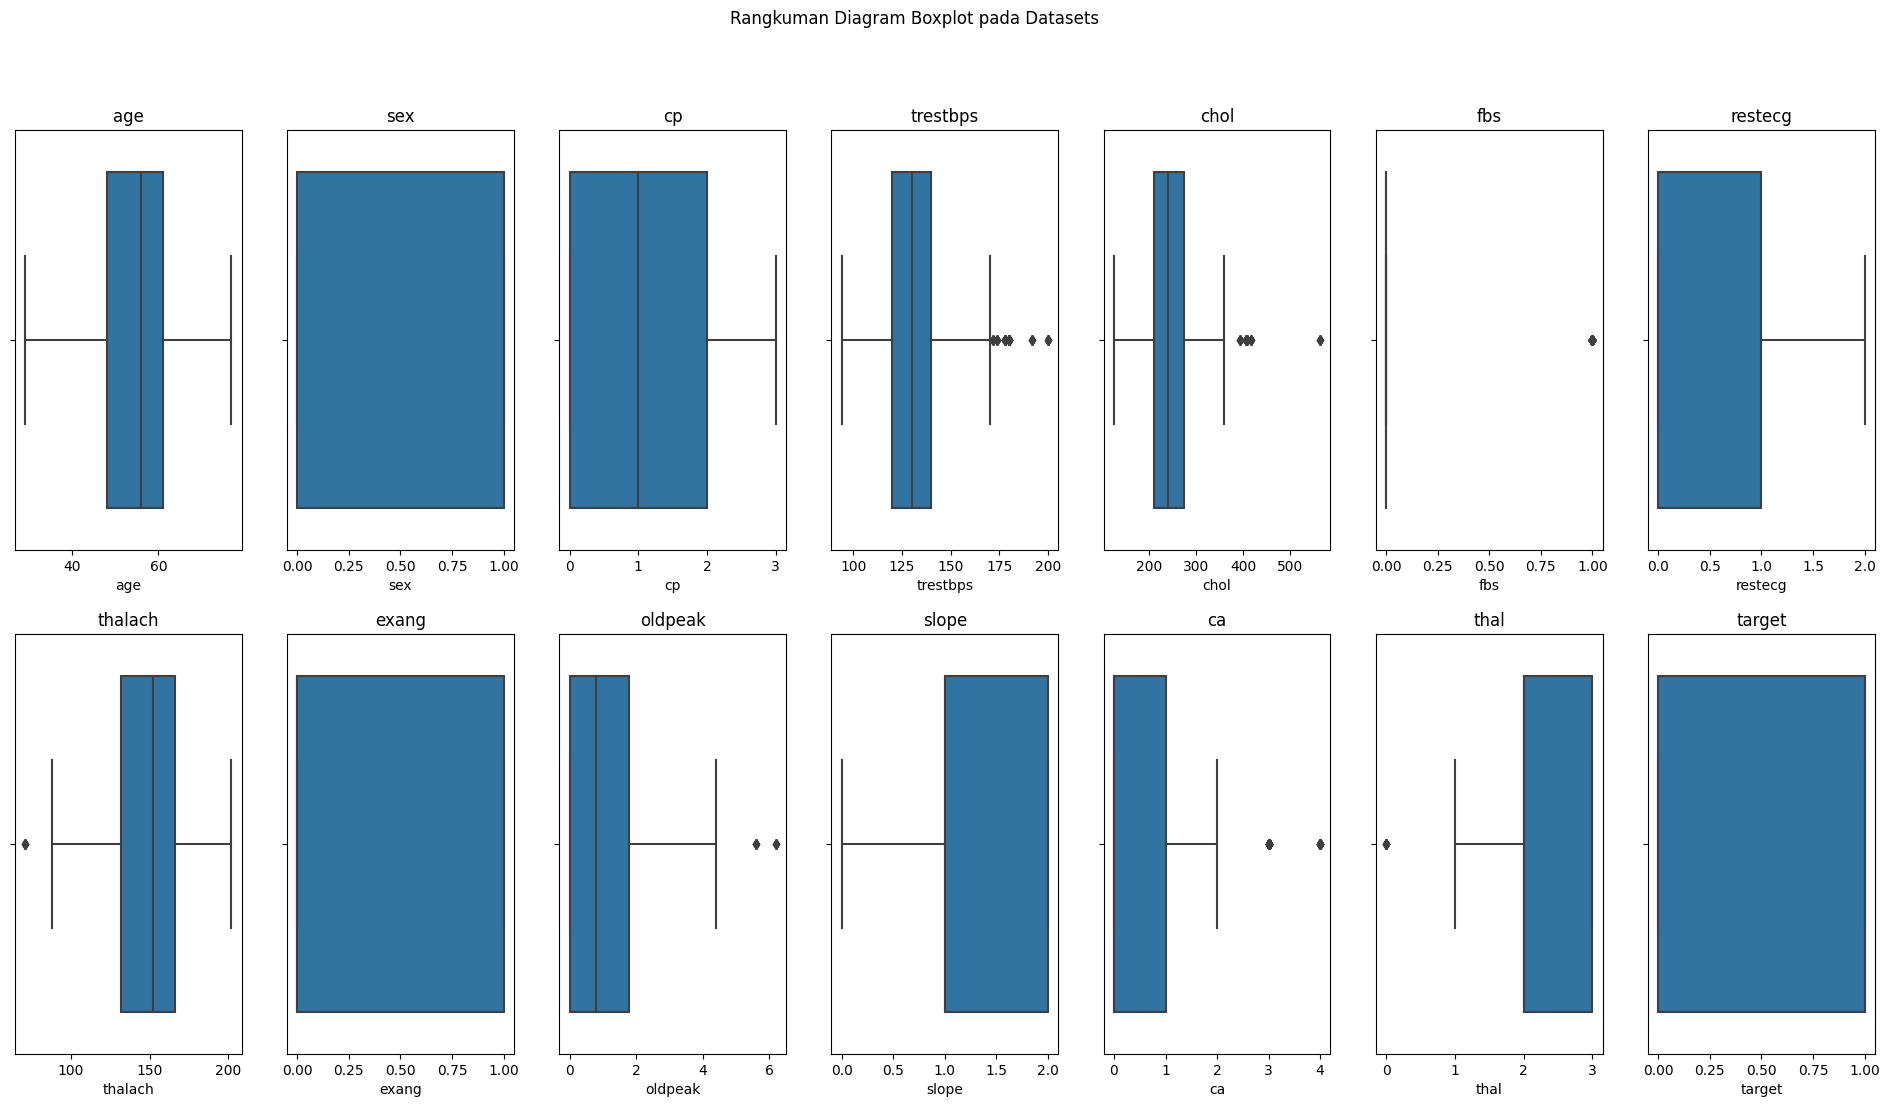

In [ ]:
# [12][13]
# atur ukuran figure(canvas) dan beri judulnya
fig, axs = plt.subplots(2, 7, figsize = (24,12))
fig.suptitle('Rangkuman Diagram Boxplot pada Datasets')

# visualisasi boxplot untuk 'age'
sns.boxplot(ax = axs[0,0], x = df['age'])
axs[0,0].set_title('age')

# visualisasi boxplot untuk 'sex'
sns.boxplot(ax = axs[0,1], x = df['sex'])
axs[0,1].set_title('sex')

# visualisasi boxplot untuk 'cp'
sns.boxplot(ax = axs[0,2], x = df['cp'])
axs[0,2].set_title('cp')

# visualisasi boxplot untuk 'trestbps'
sns.boxplot(ax = axs[0,3], x = df['trestbps'])
axs[0,3].set_title('trestbps')

# visualisasi boxplot untuk 'chol'
sns.boxplot(ax = axs[0,4], x = df['chol'])
axs[0,4].set_title('chol')

# visualisasi boxplot untuk 'fbs'
sns.boxplot(ax = axs[0,5], x = df['fbs'])
axs[0,5].set_title('fbs')

# visualisasi boxplot untuk 'restecg'
sns.boxplot(ax = axs[0,6], x = df['restecg'])
axs[0,6].set_title('restecg')

# visualisasi boxplot untuk 'thalach'
sns.boxplot(ax = axs[1,0], x = df['thalach'])
axs[1,0].set_title('thalach')

# visualisasi boxplot untuk 'exang'
sns.boxplot(ax = axs[1,1], x = df['exang'])
axs[1,1].set_title('exang')

# visualisasi boxplot untuk 'oldpeak'
sns.boxplot(ax = axs[1,2], x = df['oldpeak'])
axs[1,2].set_title('oldpeak')

# visualisasi boxplot untuk 'slope'
sns.boxplot(ax = axs[1,3], x = df['slope'])
axs[1,3].set_title('slope')

# visualisasi boxplot untuk 'ca'
sns.boxplot(ax = axs[1,4], x = df['ca'])
axs[1,4].set_title('ca')

# visualisasi boxplot untuk 'thal'
sns.boxplot(ax = axs[1,5], x = df['thal'])
axs[1,5].set_title('thal')

# visualisasi boxplot untuk 'target'
sns.boxplot(ax = axs[1,6], x = df['target'])
axs[1,6].set_title('target')

Visualisasi di atas menunjukkan terdapat outliers pada beberapa fitur dan seharusnya mendapat beberapa perlakuan. Sampai penugasan ini dibuat, belum Kami kuasai cara menangani outliers tersebut secara tepat. Sehingga, penanganan outliers akan Kami abaikan sementara waktu.

In [ ]:
# cek keseimbangan data [14]
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

Kode di atas menunjukkan bahwa porsi data berlabel '1' dan '0' masih seimbang, sehingga perlakuan resampling bisa diabaikan.

In [ ]:
# lakukan 'modifikasi' pembersihan data dan simpan ke variabel 'mod_df' [15]
# mengatasi duplikasi data
mod_df = df.drop_duplicates()

In [ ]:
# cek kembali statistik deskriptif dari datasets [8]
mod_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# cek kembali keseimbangan data [14]
mod_df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

Kode di atas menunjukkan keseimbangan data setelah menghapus duplikasi data dan masih dapat kita tolerir.

Setelah melalui tahap pembersihan datasets di atas, maka ini adalah riwayat perubahannya:
1. Perubahan jumlah data dari 1025 baris menjadi 302 baris.
2. Perubahan jumlah label '0' dari sebanyak 499 baris menjadi 138 baris.
3. Perubahan jumlah label '1' dari sebanyak 526 baris menjadi 164 baris.


##**Manual Exploratory Data Analysis**

Pada tahap ini, kami akan mencoba melakukan EDA baik dilakukan secara manual ataupun otomatis. Gunanya untuk mendapatkan wawasan (insight) menarik yang dapat kita gunakan untuk menyelesaikan permasalahan bisnis, yakni mengetahui apakah seseorang berpotensi mengalami penyakit jantung atau tidak.

Pertama-tama, mari kita cek distribusi data pada datasets kita.

Text(0.5, 1.0, 'target')

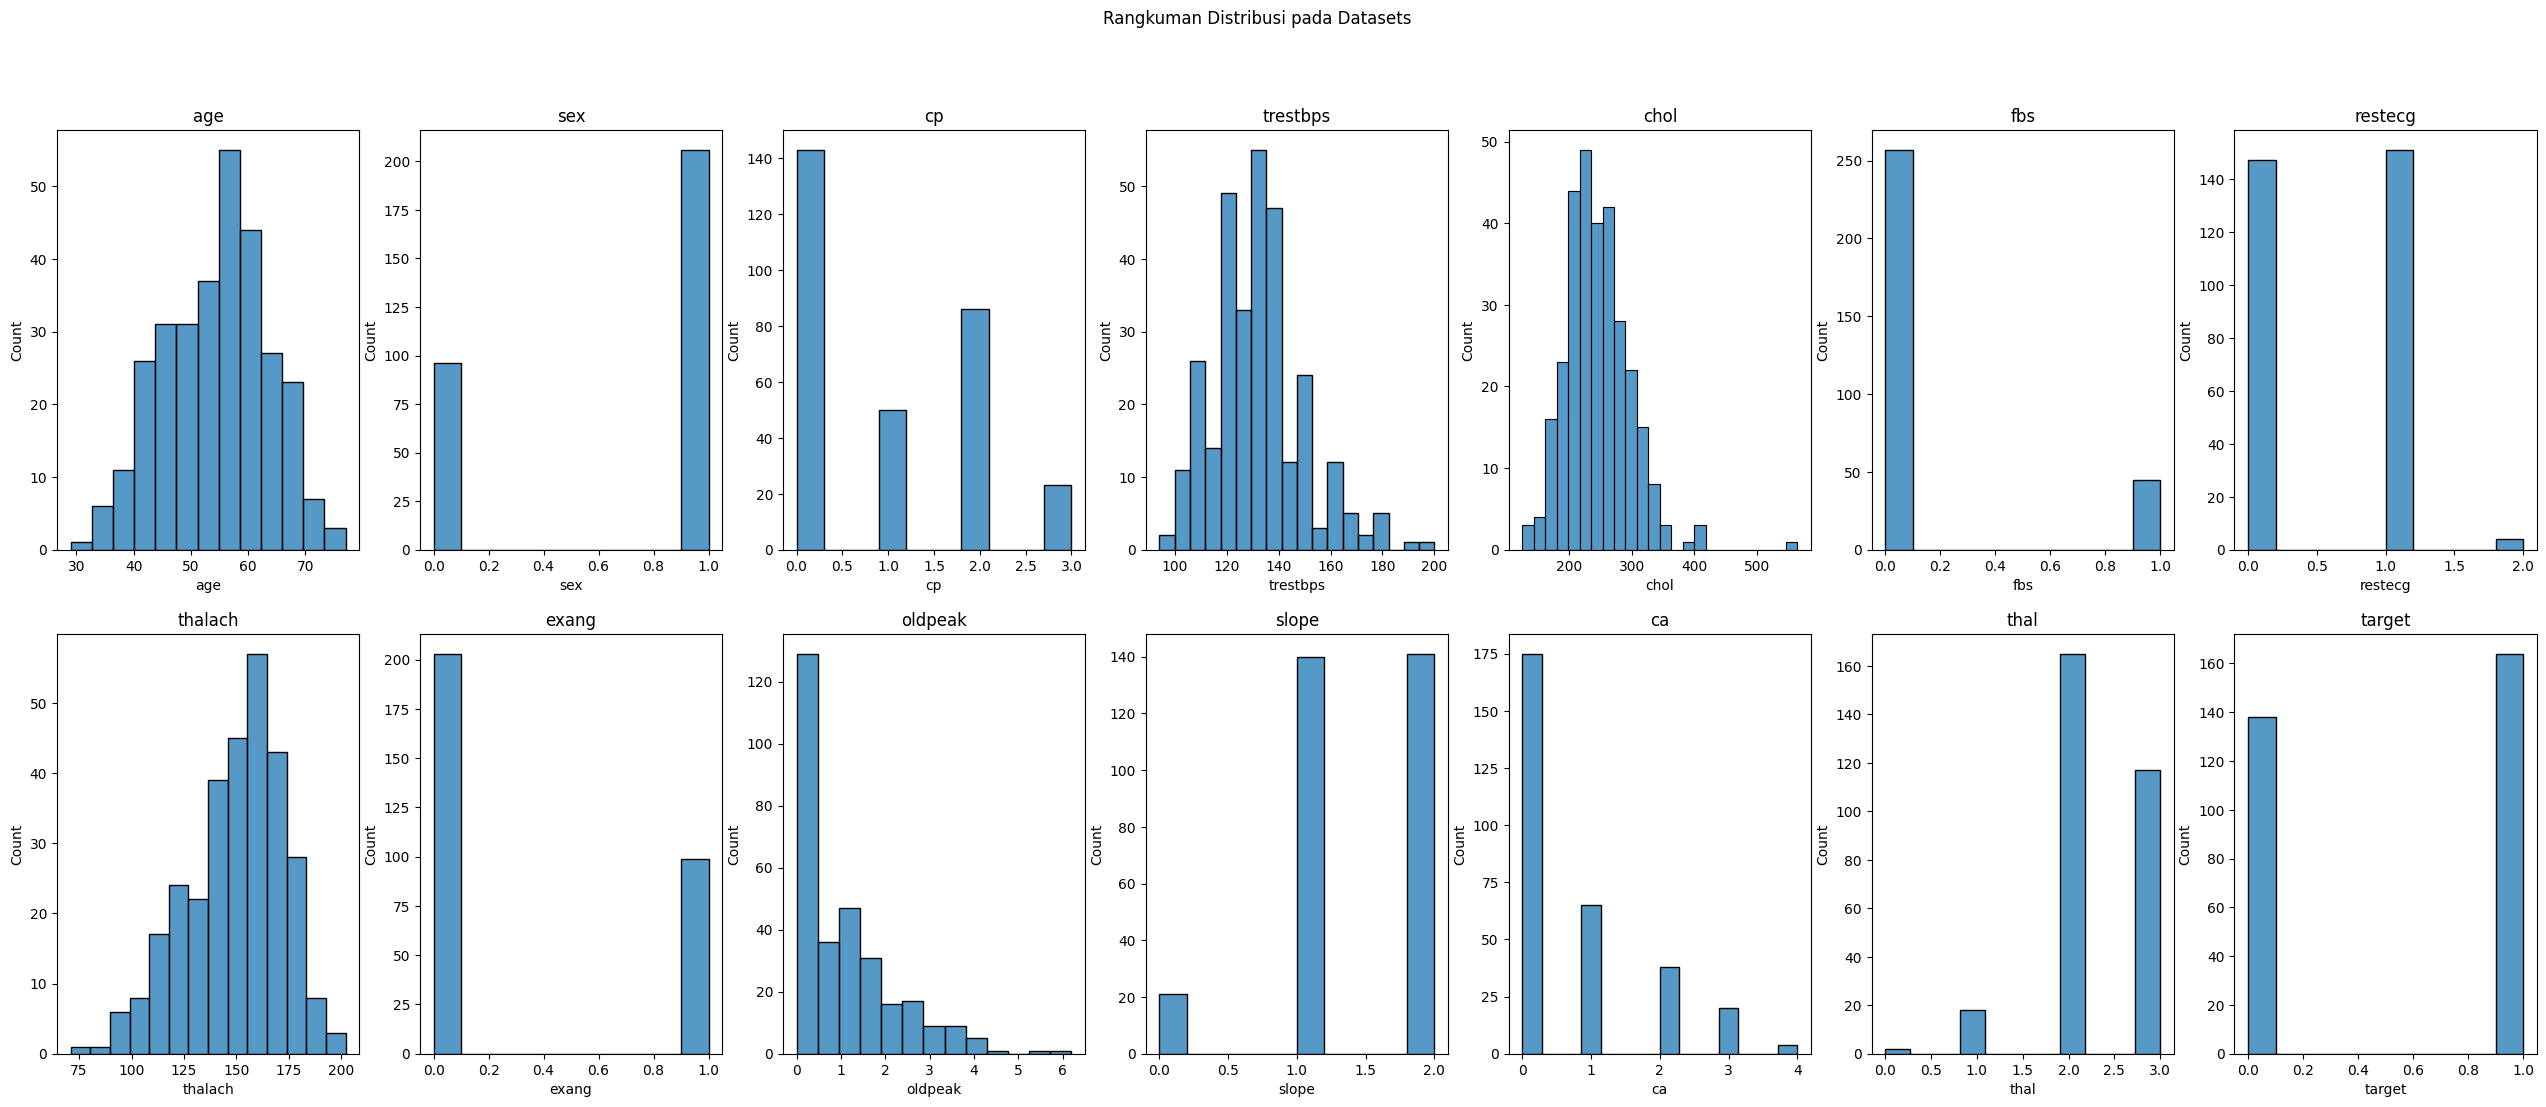

In [ ]:
# [12][16]
# atur ukuran figure(canvas) dan beri judulnya
fig, axs = plt.subplots(2, 7, figsize = (32,12))
fig.suptitle('Rangkuman Distribusi pada Datasets')

# visualisasi histogram untuk 'age'
sns.histplot(ax = axs[0,0], x = mod_df['age'])
axs[0,0].set_title('age')

# visualisasi histogram untuk 'sex'
sns.histplot(ax = axs[0,1], x = mod_df['sex'])
axs[0,1].set_title('sex')

# visualisasi histogram untuk 'cp'
sns.histplot(ax = axs[0,2], x = mod_df['cp'])
axs[0,2].set_title('cp')

# visualisasi histogram untuk 'trestbps'
sns.histplot(ax = axs[0,3], x = mod_df['trestbps'])
axs[0,3].set_title('trestbps')

# visualisasi histogram untuk 'chol'
sns.histplot(ax = axs[0,4], x = mod_df['chol'])
axs[0,4].set_title('chol')

# visualisasi histogram untuk 'fbs'
sns.histplot(ax = axs[0,5], x = mod_df['fbs'])
axs[0,5].set_title('fbs')

# visualisasi histogram untuk 'restecg'
sns.histplot(ax = axs[0,6], x = mod_df['restecg'])
axs[0,6].set_title('restecg')

# visualisasi histogram untuk 'thalach'
sns.histplot(ax = axs[1,0], x = mod_df['thalach'])
axs[1,0].set_title('thalach')

# visualisasi histogram untuk 'exang'
sns.histplot(ax = axs[1,1], x = mod_df['exang'])
axs[1,1].set_title('exang')

# visualisasi histogram untuk 'oldpeak'
sns.histplot(ax = axs[1,2], x = mod_df['oldpeak'])
axs[1,2].set_title('oldpeak')

# visualisasi histogram untuk 'slope'
sns.histplot(ax = axs[1,3], x = mod_df['slope'])
axs[1,3].set_title('slope')

# visualisasi histogram untuk 'ca'
sns.histplot(ax = axs[1,4], x = mod_df['ca'])
axs[1,4].set_title('ca')

# visualisasi histogram untuk 'thal'
sns.histplot(ax = axs[1,5], x = mod_df['thal'])
axs[1,5].set_title('thal')

# visualisasi histogram untuk 'target'
sns.histplot(ax = axs[1,6], x = mod_df['target'])
axs[1,6].set_title('target')

Selanjutnya, coba cek distribusi data dengan label sebagai pembedanya.

Text(0.5, 1.0, 'target')

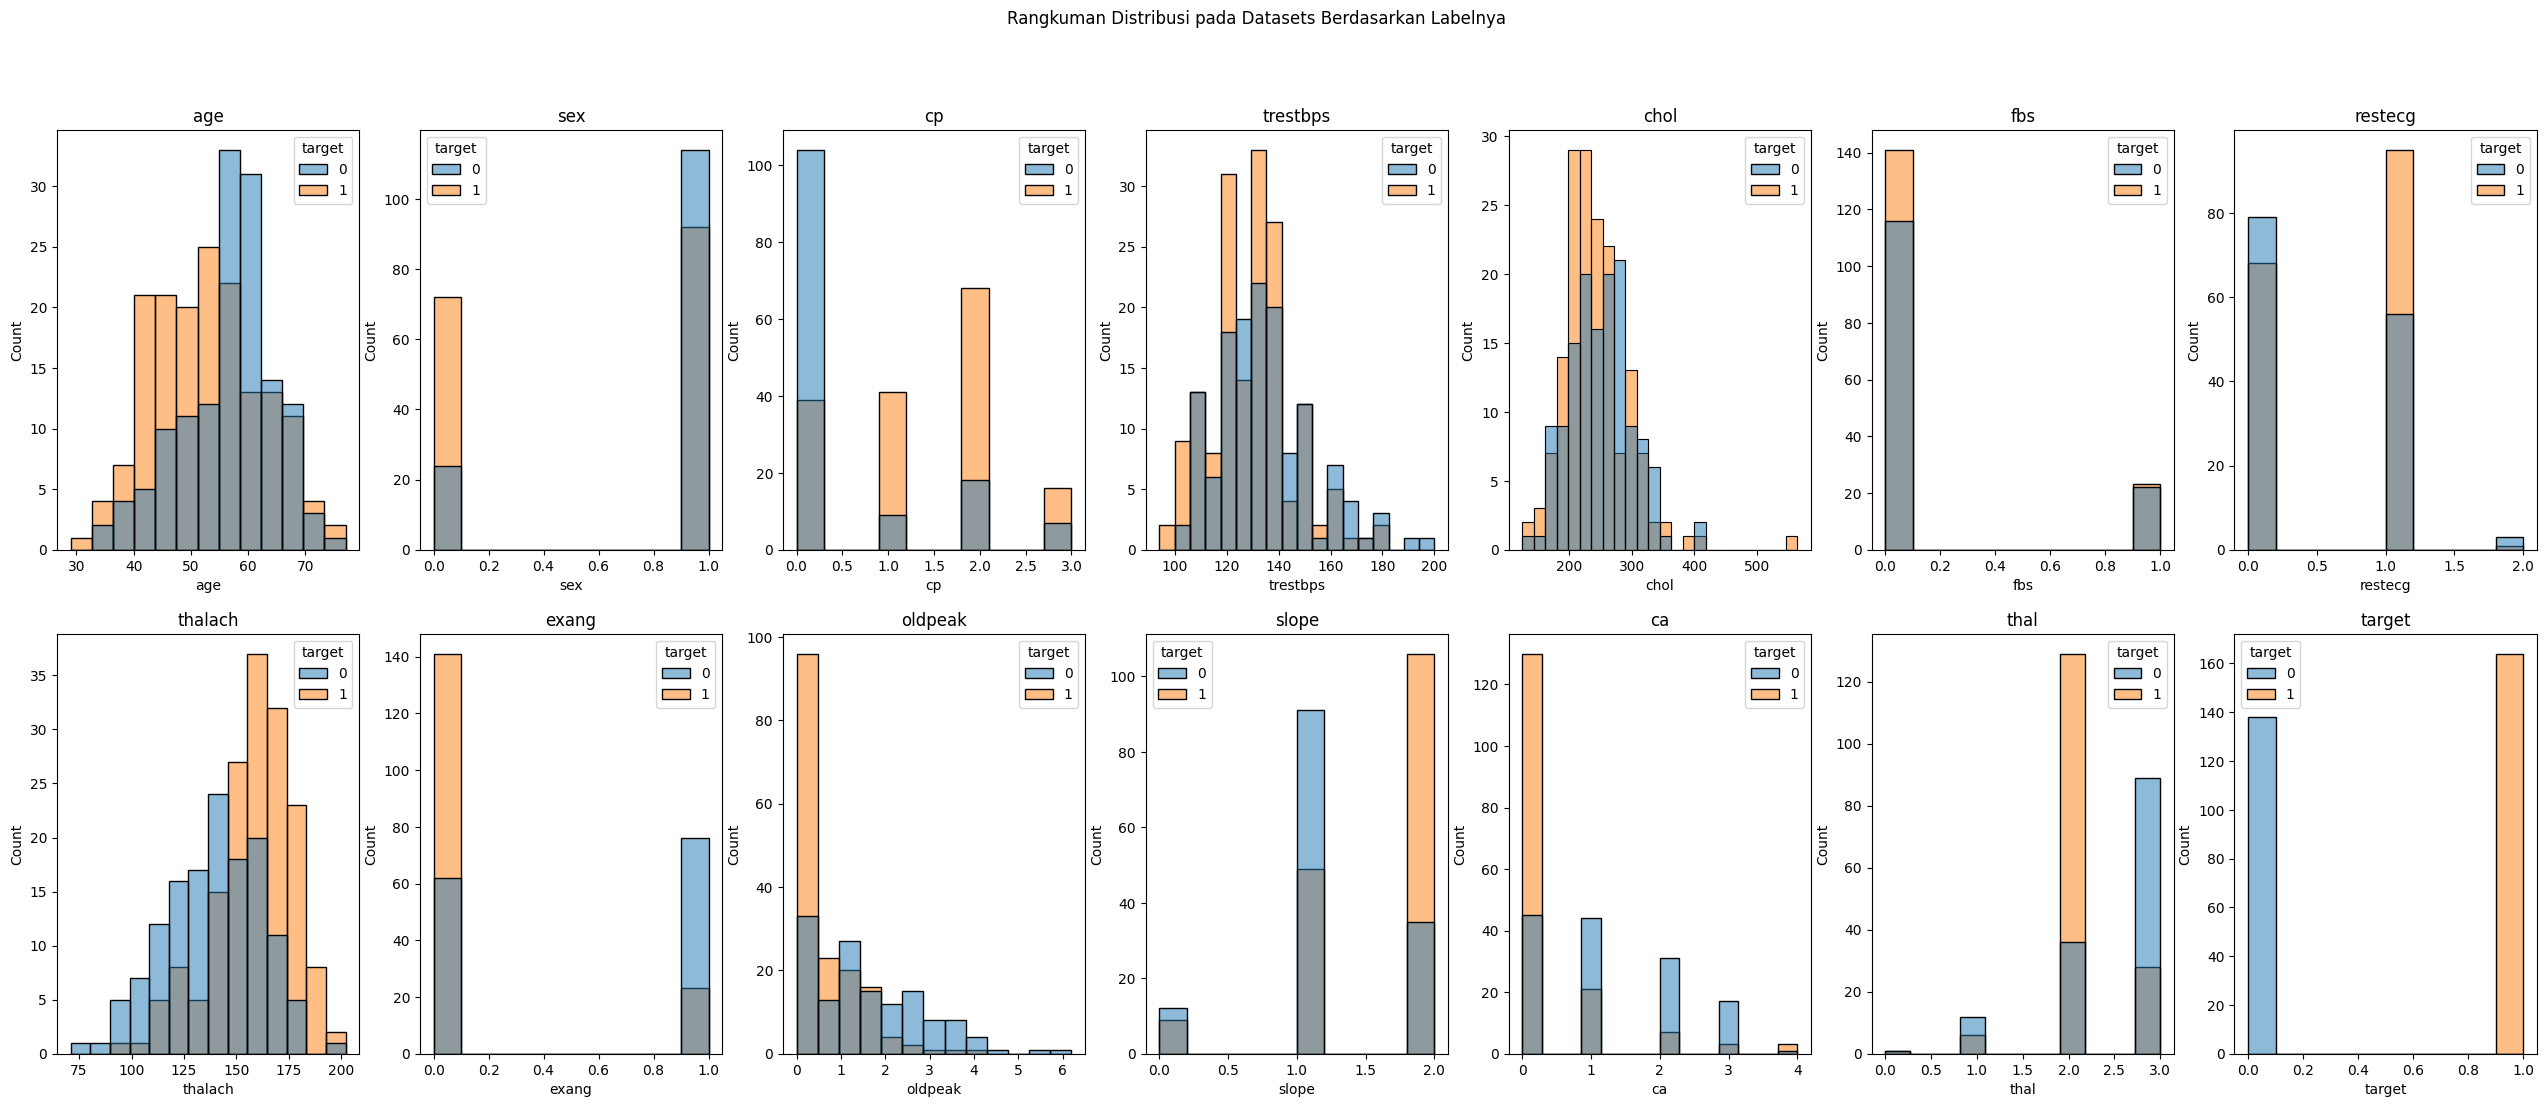

In [ ]:
# [12][13]
# atur ukuran figure(canvas) dan beri judulnya
fig, axs = plt.subplots(2, 7, figsize = (32,12))
fig.suptitle('Rangkuman Distribusi pada Datasets Berdasarkan Labelnya')

# visualisasi histogram untuk 'age'
sns.histplot(ax = axs[0,0], data = mod_df, x = 'age', hue='target')
axs[0,0].set_title('age')

# visualisasi histogram untuk 'sex'
sns.histplot(ax = axs[0,1], data = mod_df, x = 'sex', hue='target')
axs[0,1].set_title('sex')

# visualisasi histogram untuk 'cp'
sns.histplot(ax = axs[0,2], data = mod_df, x = 'cp', hue='target')
axs[0,2].set_title('cp')

# visualisasi histogram untuk 'trestbps'
sns.histplot(ax = axs[0,3], data = mod_df, x = 'trestbps', hue='target')
axs[0,3].set_title('trestbps')

# visualisasi histogram untuk 'chol'
sns.histplot(ax = axs[0,4], data = mod_df, x = 'chol', hue='target')
axs[0,4].set_title('chol')

# visualisasi histogram untuk 'fbs'
sns.histplot(ax = axs[0,5], data = mod_df, x = 'fbs', hue='target')
axs[0,5].set_title('fbs')

# visualisasi histogram untuk 'restecg'
sns.histplot(ax = axs[0,6], data = mod_df, x = 'restecg', hue='target')
axs[0,6].set_title('restecg')

# visualisasi histogram untuk 'thalach'
sns.histplot(ax = axs[1,0], data = mod_df, x = 'thalach', hue='target')
axs[1,0].set_title('thalach')

# visualisasi histogram untuk 'exang'
sns.histplot(ax = axs[1,1], data = mod_df, x = 'exang', hue='target')
axs[1,1].set_title('exang')

# visualisasi histogram untuk 'oldpeak'
sns.histplot(ax = axs[1,2], data = mod_df, x = 'oldpeak', hue='target')
axs[1,2].set_title('oldpeak')

# visualisasi histogram untuk 'slope'
sns.histplot(ax = axs[1,3], data = mod_df, x = 'slope', hue='target')
axs[1,3].set_title('slope')

# visualisasi histogram untuk 'ca'
sns.histplot(ax = axs[1,4], data = mod_df, x = 'ca', hue='target')
axs[1,4].set_title('ca')

# visualisasi histogram untuk 'thal'
sns.histplot(ax = axs[1,5], data = mod_df, x = 'thal', hue='target')
axs[1,5].set_title('thal')

# visualisasi histogram untuk 'target'
sns.histplot(ax = axs[1,6], data = mod_df, x = 'target', hue='target')
axs[1,6].set_title('target')

Dari visualisasi ini saja sudah kita dapatkan beberapa wawasan berguna seperti:
1. Kasus penyakit jantung banyak terjadi di rentang usia 40 - 60 tahun.
2. Penderita penyakit jantung banyak diderita oleh laki-laki.
3. Orang tanpa penyakit jantung kebanyakan memiliki tipe sakit dada berupa Typical Angina, sedangkan penderita penyakit jantung justru tidak memiliki sakit dada.
4. Pada rentang tekanan darah ketika relaksasi 120 - 140 mm Hg, kasus penyakit jantung justru banyak terjadi.
5. Pada rentang tingkat kolesterol 200 - 300 mg/dl, kasus penyakit jantung juga banyak terjadi.
6. Orang dengan tingkat oldpeak yang rendah berpotensi memiliki penyakit jantung.
7. Kasus penyakit jantung banyak terjadi pada orang yang memiliki hipertensi (tekanan darah tinggi).
8. Kasus penyakit jantung banyak terjadi pada orang yang tidak memiliki exang (latihan induksi angina).
9. Orang dengan tipe slope 2 (miring ke bawah) berpotensi terkena penyakit jantung.
10. Orang dengan tingkat ca yang rendah berpotensi memiliki penyakit jantung.

Bagus! Wawasan kita sudah banyak. Sekarang kita lanjut untuk melihat korelasinya!

<Axes: title={'center': 'Tabel Korelasi dengan Diagram Heatmap'}>

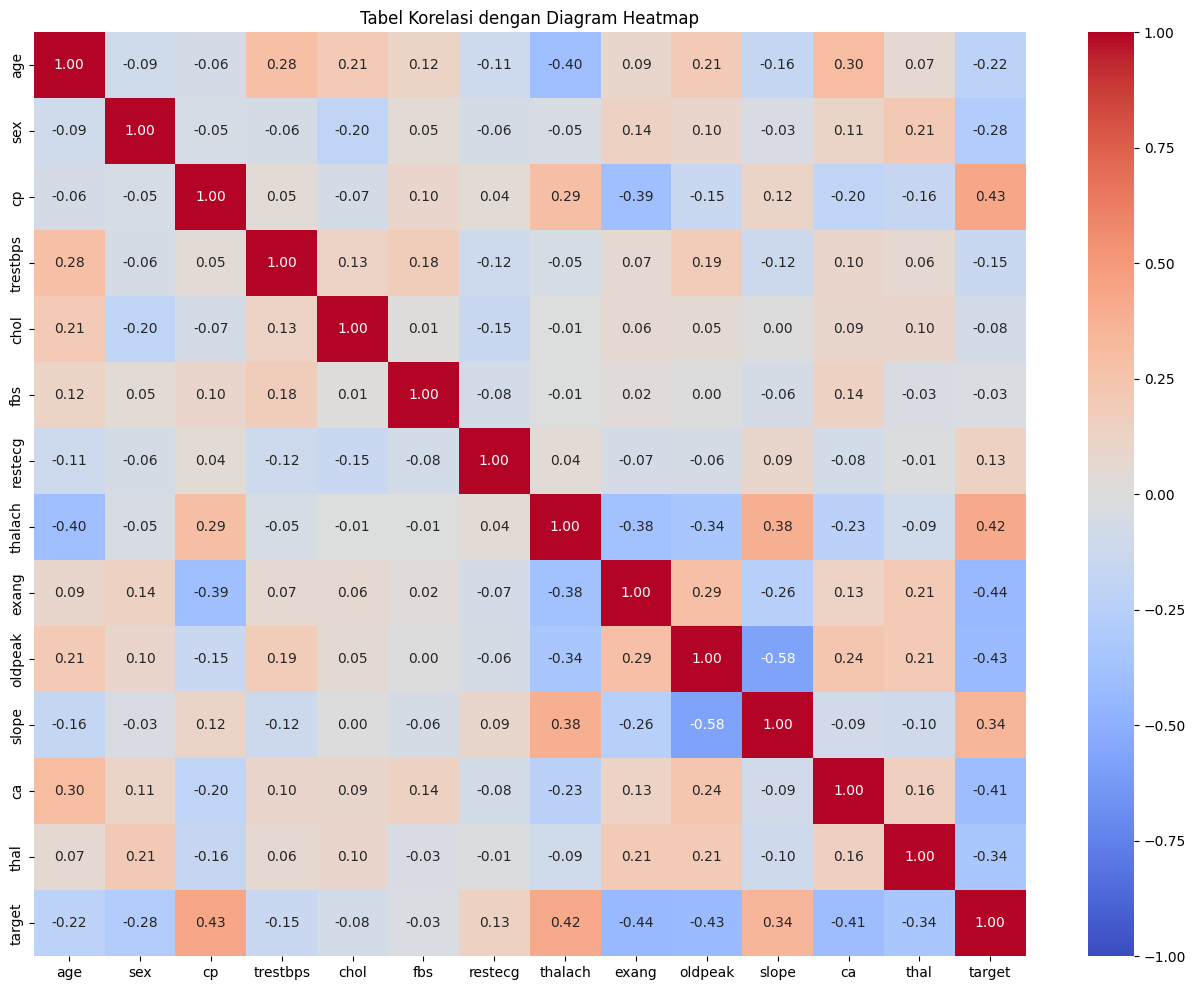

In [ ]:
# buat tabel korelasi dengan fungsi corr() [17]
# mod_df.corr()

# tampilkan visualisasi heatmap dari tabel korelasi tersebut [18]
plt.figure(figsize = (16, 12))
plt.title('Tabel Korelasi dengan Diagram Heatmap')
sns.heatmap(mod_df.corr(), annot=True,
            fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

Setelah kita membuat tabel korelasi dan memvisualisasikannya ke dalam diagram heatmap, dapat kita petik wawasan lagi bahwa:
1. Yang berkorelasi positif sedang dengan prediksi penyakit jantung adalah:
  * cp.
  * thalach.
  * slope.
2. Yang berkorelasi negatif sedang dengan prediksi penyakit jantung adalah:
  * exang.
  * oldpeak.
  * ca.
  * thal.

Dengan demikian, kita dapat mereduksi fitur-fitur dengan hanya menggunakan korelasi yang tinggi saja. Walaupun pada kasus ini kita hanya memperoleh korelasi sedang saja.

##**Automated Exploratory Data Analysis**

Tujuan utama dari EDA adalah untuk menemukan pola dan wawasan yang berguna untuk kita analisis, tinggal yang membedakan adalah pendekatannya. Kita dapat melakukan secara manual atau otomatis menggunakan library yang tersedia. Pada penugasan ini, kita akan melakukan Automated EDA menggunakan library Dataprep.

Mungkin kita akan mulai dari melihat analisis dari distribusi data.

In [ ]:
# lihat analisis distribusi data [19]
plot(mod_df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# lihat korelasi [20]
plot_correlation(mod_df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# lihat missing value [21]
plot_missing(mod_df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# lihat laporan akhirnya [22]
final_report = create_report(mod_df)
final_report.save('Laporan Automated EDA Assignment 2')
# final_report.show()

Report has been saved to Laporan Automated EDA Assignment 2.html!


#**IV. Modelling**

Pada tahap ini kita akan mencoba melakukan modelling dengan data kita.

##**Hipotesa**

Sebelum kita melakukan pemilihan model, mari kita lakukan seleksi fitur dari yang memiliki korelasi saja, baik korelasi positif ataupun negatif.

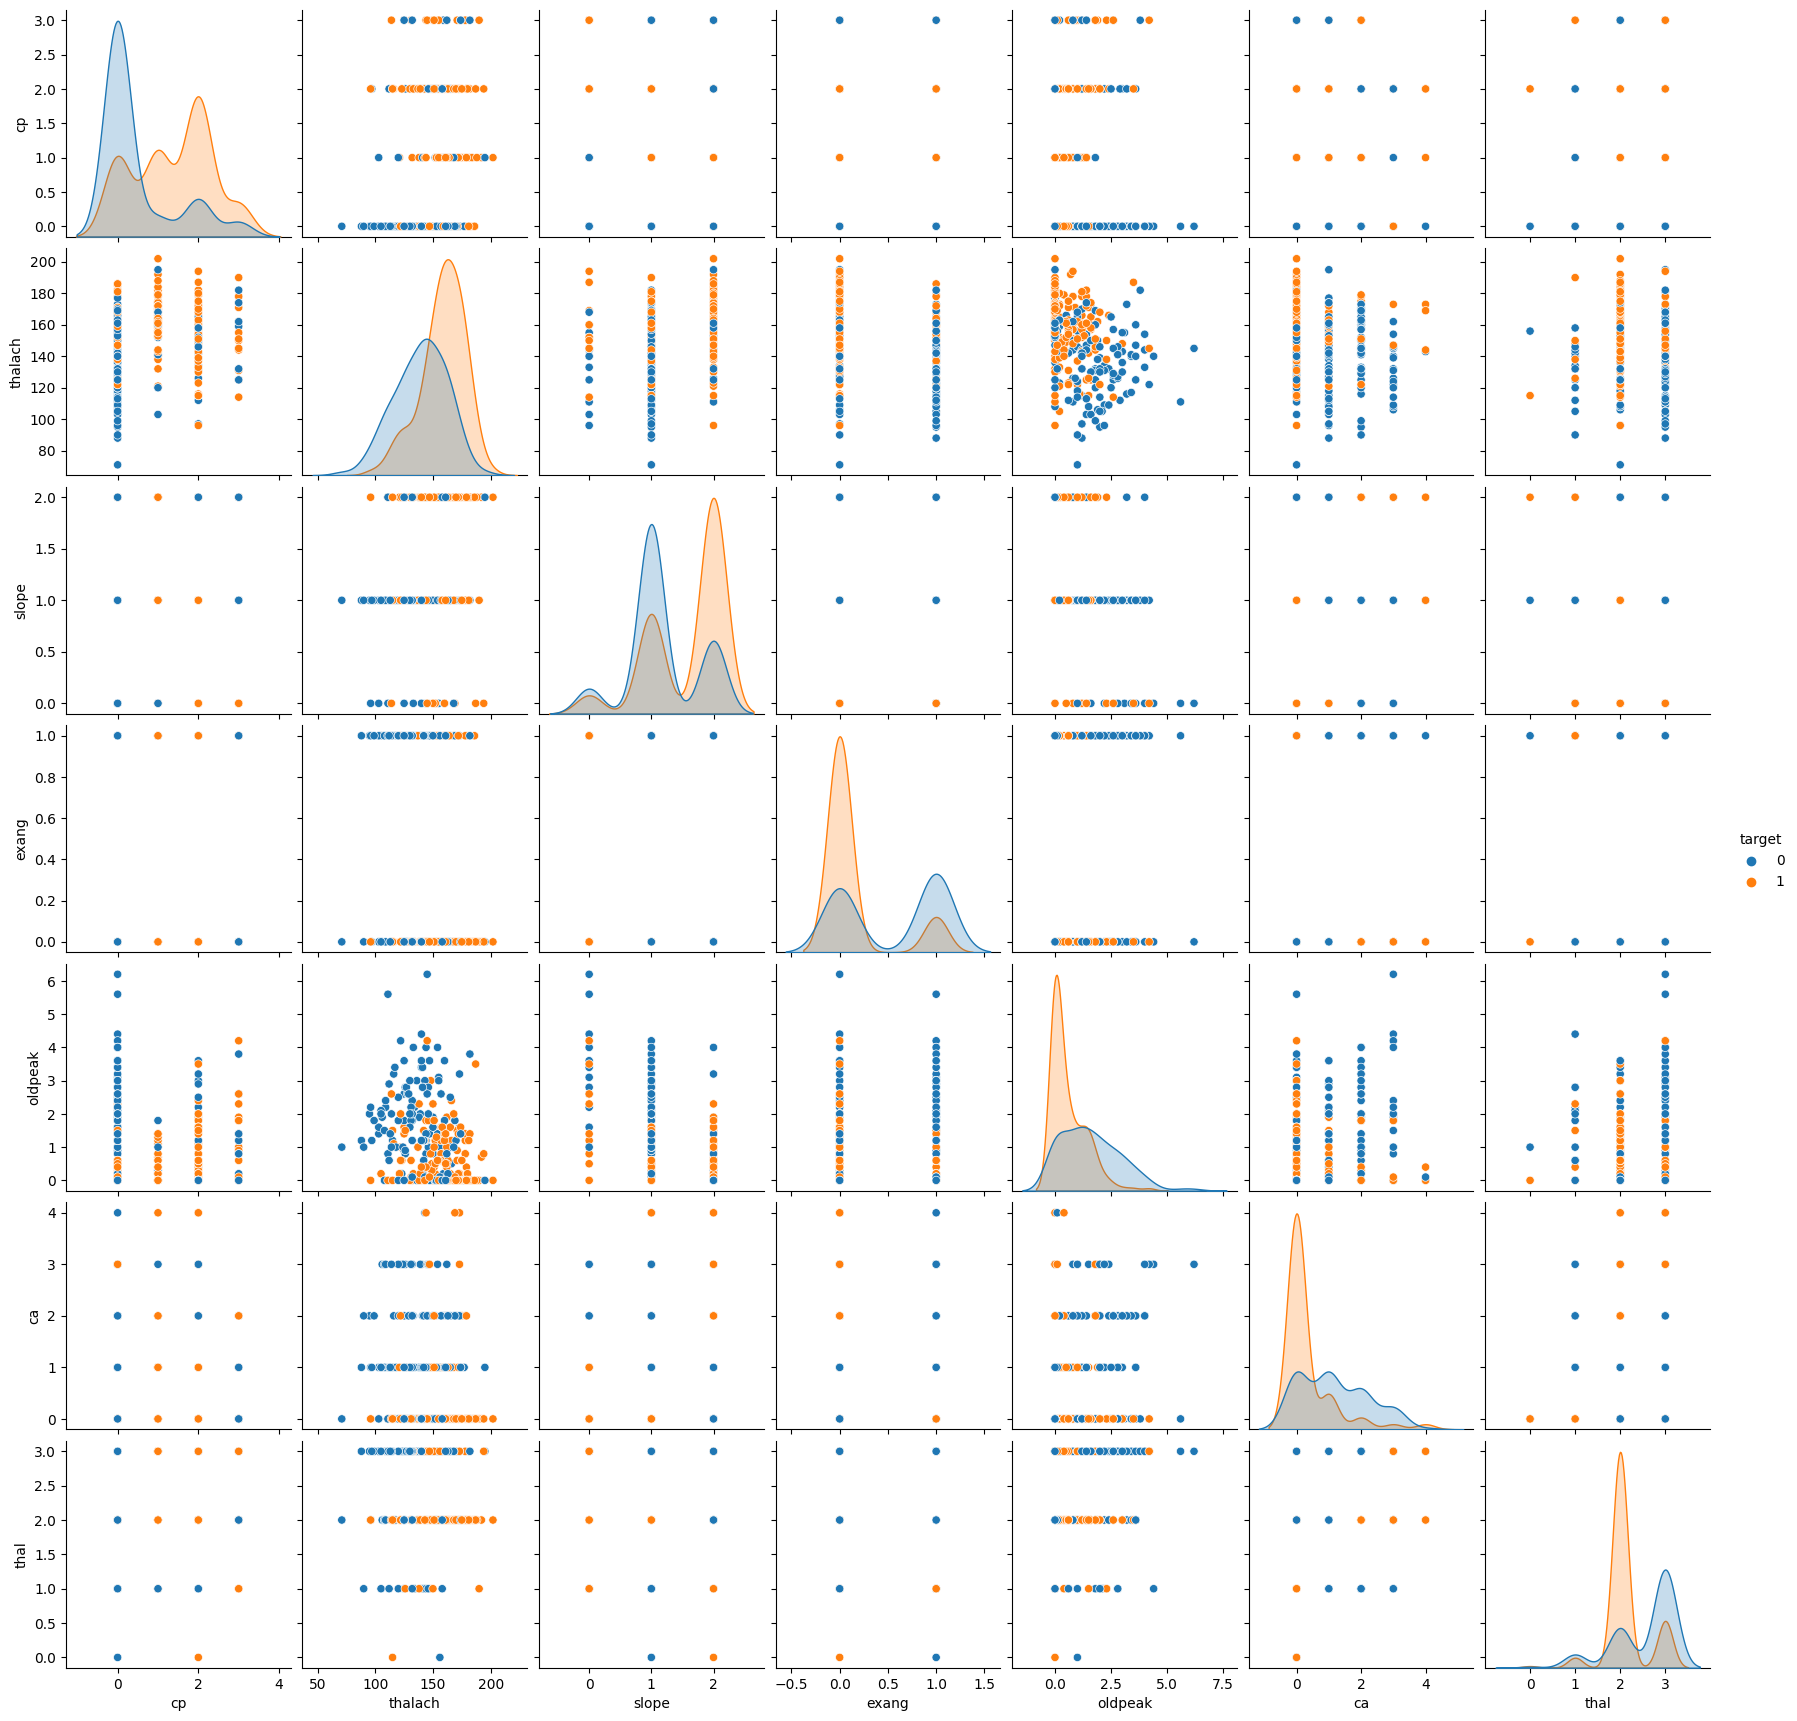

In [ ]:
# simpan seleksi fitur ke variabel 'mod2_df'
mod2_df = mod_df[['cp','thalach', 'slope', 'exang', 'oldpeak', 'ca', 'thal', 'target']]

# lihat pairplot yang diberikan [23]
sns.pairplot(data = mod2_df, hue = 'target')

Pada hubungan pairplot di atas, dapat kita lihat beberapa korelasi fitur yang dapat kita lihat polanya seperti:
1. korelasi cp dengan ca.
2. korelasi thal dengan ca.
3. korelasi slope dengan thal.
4. korelasi slope dengan ca.

Karena alasan itulah, hipotesa model yang akan digunakan dapat menggunakan:
1. `Decision Tree`.
2. `Random Forest`.

Pemilihan model tersebut bukan tanpa alasan, berikut adalah keuntungan yang kita dapatkan ketika menggunakan kedua model terkait:
1. Terlihat pada visualisasi pairplot, beberapa fitur terpilih memiliki visualisasi yang sederhana.
2. Beban komputasi training model cukup ringan, tinggal bagaimana pemilihan hyperparameter yang sesuai.

##**Create Model**

Kita kemudian akan melakukan pelatihan model dengan `Decision Tree` dan `Random Forest` sebelum melakukan validasi apapun.

Pada tahap ini, Kita akan menentukan besaran parameter yang ditetapkan seperti `max_depth = 3` untuk kedua model dan `n_estimators = 4` untuk model Random Forest.

In [ ]:
# import library tambahan [24]
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# pisahkan variabel bebas dan tergantung [25]
# pada penugasan ini, variabel bebas hanya mengacu pada fitur yang memiliki korelasi
x = mod2_df.iloc[:, :-1]
y = mod2_df.iloc[:, -1]

# lakukan train-test-split [26]
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# buat model decision tree dengan node maksimal 3
dt_model = DecisionTreeClassifier(max_depth = 3)

# latih model dan simpan hasil prediksi
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

# cetak akurasi [27]
dt_acc = accuracy_score(y_test, dt_pred)
print("Model Decision Tree memiliki akurasi sebesar:", dt_acc.round(2))

Model Decision Tree memiliki akurasi sebesar: 0.77


[Text(0.5, 0.875, 'cp <= 0.5\ngini = 0.489\nsamples = 211\nvalue = [90, 121]\nclass = 1'),
 Text(0.25, 0.625, 'oldpeak <= 0.7\ngini = 0.396\nsamples = 92\nvalue = [67, 25]\nclass = 0'),
 Text(0.125, 0.375, 'ca <= 0.5\ngini = 0.499\nsamples = 40\nvalue = [19, 21]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.36\nsamples = 17\nvalue = [13, 4]\nclass = 0'),
 Text(0.375, 0.375, 'thal <= 2.5\ngini = 0.142\nsamples = 52\nvalue = [48, 4]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.391\nsamples = 15\nvalue = [11, 4]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]\nclass = 0'),
 Text(0.75, 0.625, 'oldpeak <= 1.95\ngini = 0.312\nsamples = 119\nvalue = [23, 96]\nclass = 1'),
 Text(0.625, 0.375, 'ca <= 0.5\ngini = 0.25\nsamples = 109\nvalue = [16, 93]\nclass = 1'),
 Text(0.5625, 0.125, 'gini = 0.167\nsamples = 76\nvalue = [7, 69]\nclass = 1'),
 Text(0.6875, 0.125, 'gini = 0.397\nsamples = 

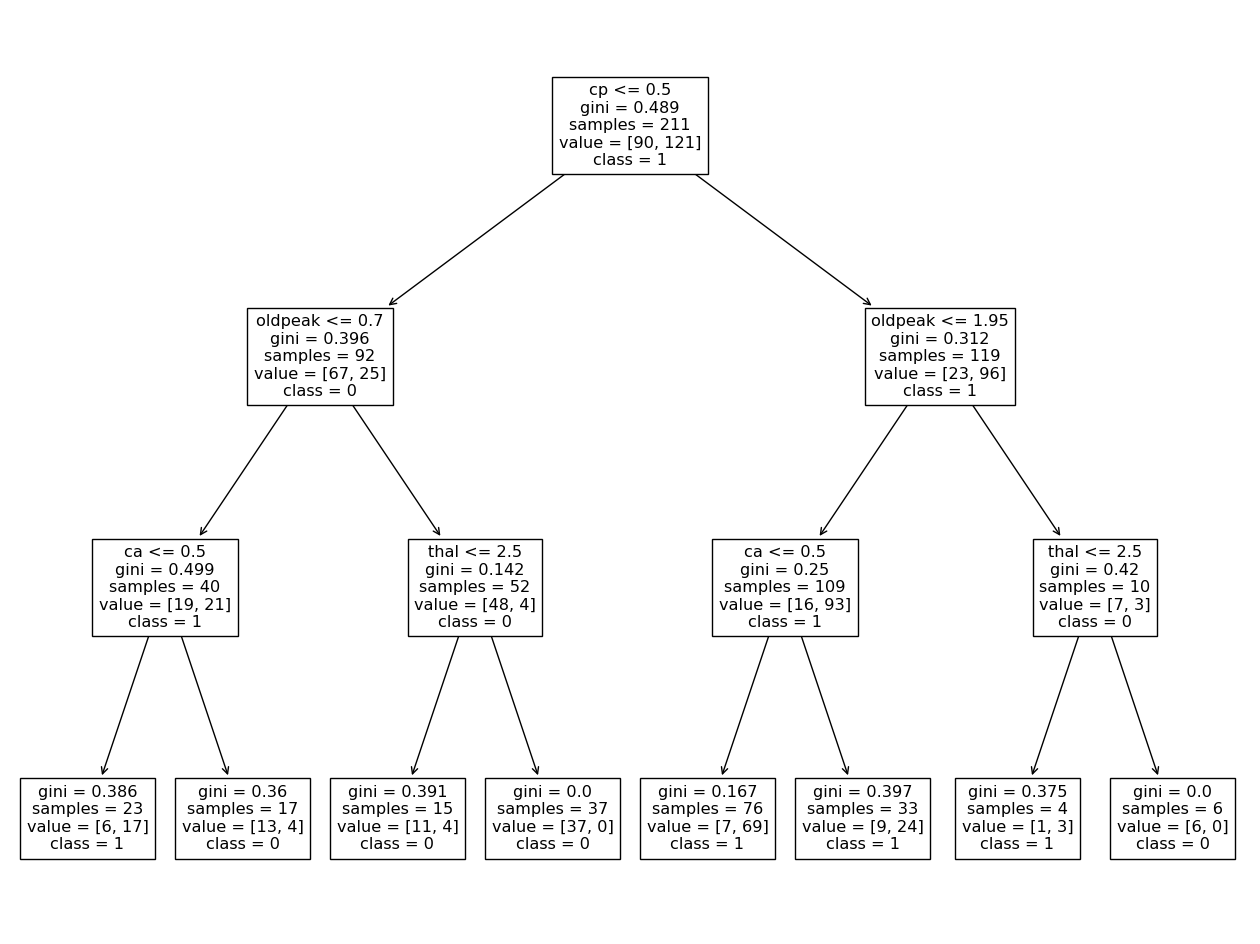

In [ ]:
# cetak gambar model decision tree [28]
plt.figure(figsize = (16, 12))
tree.plot_tree(dt_model,
               feature_names = tuple(x.columns),
               class_names = ('0', '1'))

In [ ]:
# buat model random forest [29]
rf_model = RandomForestClassifier(n_estimators = 4, max_depth = 3)

# latih model dan simpan hasil prediksi
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

# cetak akurasi [27]
rf_acc = accuracy_score(y_test, rf_pred)
print("Model Random Forest memiliki akurasi sebesar:", rf_acc.round(2))

Model Random Forest memiliki akurasi sebesar: 0.79


##**Model Validation**

Pada langkah ini, kita akan menggunakan dua jenis validasi model seperti `K-Cross Validation` dan `Bootstraping Validation`.

In [ ]:
# model decision tree dengan k-cross validation [30]
dt_kc_acc = cross_val_score(dt_model, x, y, cv=5)
print("Model Decision Tree dengan 5-Cross Validation memiliki akurasi sebesar:", dt_kc_acc.mean().round(2),
      "dengan standar deviasi sebesar:", dt_kc_acc.std().round(3))

Model Decision Tree dengan 5-Cross Validation memiliki akurasi sebesar: 0.82 dengan standar deviasi sebesar: 0.048


In [ ]:
# model decision tree bootstraping validation
n = 100
dt_b_acc = []

for i in range(n):
  # sample acak
  indices = np.random.choice(range(len(y)),
                             size = len(x),
                             replace = True)
  x_boot = x.iloc[indices]
  y_boot = y.iloc[indices]

  # latih model
  dt_model.fit(x_boot, y_boot)

  # simpan riwayat akurasi
  accuracies = dt_model.score(x, y)
  dt_b_acc.append(accuracies)

np.mean(dt_b_acc).round(2)
np.std(dt_b_acc).round(3)

print("Model Decision Tree dengan Bootstraping Validation memiliki akurasi sebesar:", np.mean(dt_b_acc).round(2),
      "dengan standar deviasi sebesar:", np.std(dt_b_acc).round(3))

Model Decision Tree dengan Bootstraping Validation memiliki akurasi sebesar: 0.83 dengan standar deviasi sebesar: 0.018


In [ ]:
# model random forest dengan k-cross validation [30]
rf_kc_acc = cross_val_score(rf_model, x, y, cv=5)
print("Model Random Forest dengan 5-Cross Validation memiliki akurasi sebesar:", rf_kc_acc.mean().round(2),
      "dengan standar deviasi sebesar:", rf_kc_acc.std().round(3))

Model Random Forest dengan 5-Cross Validation memiliki akurasi sebesar: 0.82 dengan standar deviasi sebesar: 0.065


In [ ]:
# model random forest bootstraping validation
n = 100
rf_b_acc = []

for i in range(n):
  # sample acak
  indices = np.random.choice(range(len(y)),
                             size = len(x),
                             replace = True)
  x_boot = x.iloc[indices]
  y_boot = y.iloc[indices]

  # latih model
  rf_model.fit(x_boot, y_boot)

  # simpan riwayat akurasi
  accuracies = rf_model.score(x, y)
  rf_b_acc.append(accuracies)

np.mean(rf_b_acc).round(2)
np.std(rf_b_acc).round(3)

print("Model Random Forest dengan Bootstraping Validation memiliki akurasi sebesar:", np.mean(rf_b_acc).round(2),
      "dengan standar deviasi sebesar:", np.std(rf_b_acc).round(3))

Model Random Forest dengan Bootstraping Validation memiliki akurasi sebesar: 0.83 dengan standar deviasi sebesar: 0.018


##**Feature Importance**

Selanjutnya, kita akan coba melihat fitur-fitur apa saja yang sekiranya memiliki peranan penting dalam pelatihan model.

<BarContainer object of 7 artists>

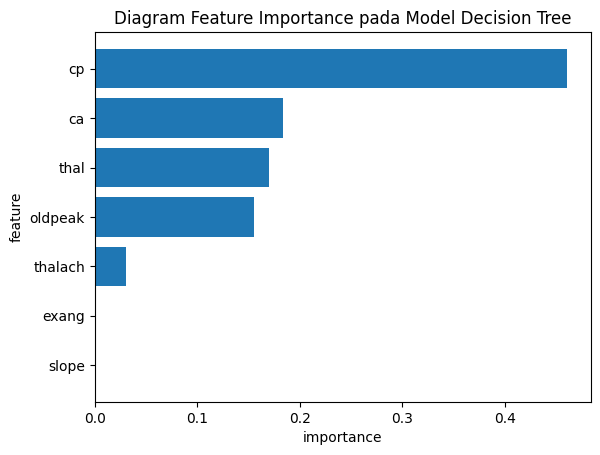

In [ ]:
# ambil feature yang penting
dt_feat_imp = pd.DataFrame({'Feature' : tuple(mod2_df.columns[:-1]),
                         'Importance' : dt_model.feature_importances_})
dt_feat_imp.sort_values('Importance', inplace = True)

# buat plot feature importance untuk model decision tree
plt.title('Diagram Feature Importance pada Model Decision Tree')
plt.ylabel('feature')
plt.xlabel('importance')
plt.barh(dt_feat_imp['Feature'], dt_feat_imp['Importance'])

<BarContainer object of 7 artists>

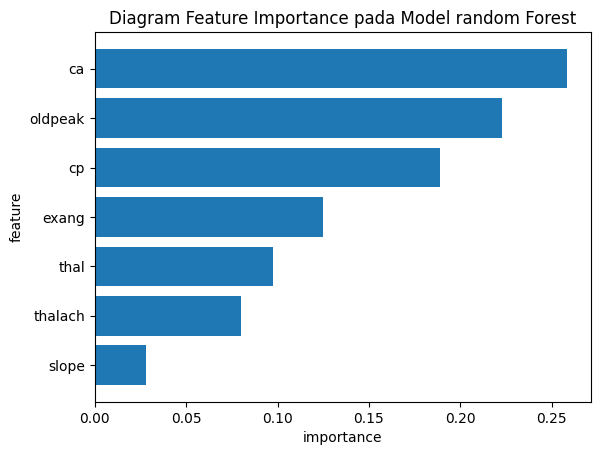

In [ ]:
# ambil feature yang penting
rf_feat_imp = pd.DataFrame({'Feature' : tuple(mod2_df.columns[:-1]),
                         'Importance' : rf_model.feature_importances_})
rf_feat_imp.sort_values('Importance', inplace = True)

# buat plot feature importance untuk model random forest
plt.title('Diagram Feature Importance pada Model random Forest')
plt.ylabel('feature')
plt.xlabel('importance')
plt.barh(rf_feat_imp['Feature'], rf_feat_imp['Importance'])

In [ ]:
# rekap feature importance untuk kedua model
all_feat_imp = pd.DataFrame({'Feature' : tuple(mod2_df.columns[:-1]),
                             'Importance for Decision Tree' : dt_model.feature_importances_,
                             'Importance for Random Forest' : rf_model.feature_importances_})
all_feat_imp

,Feature,Importance for Decision Tree,Importance for Random Forest
0,cp,0.460400,0.188762
1,thalach,0.030531,0.079801
2,slope,0.000000,0.027831
3,exang,0.000000,0.125046
4,oldpeak,0.155725,0.222905
5,ca,0.183437,0.258290
6,thal,0.169908,0.097365


Demikianlah untuk rekap feature importance pada kedua model. Perlu diingat bahwa `kedua model dapat menghasilkan feature importance yang berbeda ketika dieksekusi pada waktu yang berbeda`.

#**V. Daftar Referensi**

Ini adalah rekap sumber-sumber yang kami jadikan bahan referensi guna menyelesaikan penugasan ini.

In [ ]:
# [1] https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
# [2] https://colab.research.google.com/notebooks/io.ipynb
# [3] https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# [4] https://docs.python.org/3/library/io.html
# [5] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
# [6] https://archive.ics.uci.edu/ml/datasets/Heart+Disease
# [7] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
# [8] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# [9] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
# [10] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
# [11] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
# [12] https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# [13] https://seaborn.pydata.org/generated/seaborn.boxplot.html
# [14] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
# [15] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# [16] https://seaborn.pydata.org/generated/seaborn.histplot.html
# [17] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# [18] https://seaborn.pydata.org/generated/seaborn.heatmap.html
# [19] https://docs.dataprep.ai/user_guide/eda/plot.html
# [20] https://docs.dataprep.ai/user_guide/eda/plot_correlation.html
# [21] https://docs.dataprep.ai/user_guide/eda/plot_missing.html
# [22] https://docs.dataprep.ai/api_reference/dataprep.eda.create_report.html
# [23] https://seaborn.pydata.org/generated/seaborn.pairplot.html
# [24] https://scikit-learn.org/stable/modules/classes.html
# [25] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
# [26] http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# [27] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# [28] https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
# [29] http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# [30] http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html